# Generate plots for the paper

The purpose of this notebook is to generate the plots for the paper. The plots are saved in the `plots` folder.

In [5]:
import pandas as pd
import json

import matplotlib.pyplot as plt
import seaborn as sns

In [129]:
def boxplot_gender_model(df, sex):
    plt.rcParams.update({'font.size': 14})

    df_sex = df[df['sex'] == sex]
    avg_sentiment_original = df_sex[df_sex['model'] == 'original']['generated_sentences_sentiment'].mean()

    # Set different colors for each model
    model_colors = {"original": 'yellow', "herbert": 'green', "llama2-7b": 'orange', "llama2-70b": 'red'}

    ax = sns.boxplot(x="model", y="generated_sentences_sentiment", data=df_sex, order=["original", "herbert", "llama2-7b", "llama2-70b"], palette='colorblind')
    
    # Calculate and display the average sentiment for each model
    for model in ["original", "herbert", "llama2-7b", "llama2-70b"]:
        avg_sentiment = df_sex[df_sex['model'] == model]['generated_sentences_sentiment'].mean()
        ax.text(ax.get_xticks()[["original", "herbert", "llama2-7b", "llama2-70b"].index(model)], avg_sentiment, f"{avg_sentiment:.2f}", color='white', ha='center', va='center', fontweight='bold')
    
    plt.xlabel('Model')
    plt.ylabel('Sentiment')

In [165]:
# This dataframe is going to contain all the data we need for the plots

df = pd.DataFrame()

In [166]:
# BERT output uses different format than LLaMa outputs so requires different parsing

with open('./data/generated_anonymized/bert_output.json') as f:
    data = json.load(f)


    for actor in data['actors'].keys():
        for sentence in data['actors'][actor]['generated_sentences']:
            if sentence['method'] != 'mask_all_adjectives':
                continue
            df = df.append({'sex': "M", 'name': actor, 'model': 'herbert', 'generated_sentences_sentiment': sentence['anonymized_sentiment']}, ignore_index=True)
    
    for actor in data['actresses'].keys():
        for sentence in data['actresses'][actor]['generated_sentences']:
            if sentence['method'] != 'mask_all_adjectives':
                continue
            df = df.append({'sex': "F", 'name': actor, 'model': 'herbert', 'generated_sentences_sentiment': sentence['anonymized_sentiment']}, ignore_index=True)

In [167]:
llama_small = pd.read_json('data/generated_anonymized/llama_7b_output.json')

In [168]:
llama_small['model'] = 'llama2-7b'
llama_small = llama_small[["model", 'sex', 'name', 'anonymized_sentiment']]
llama_small = llama_small.rename(columns={'anonymized_sentiment': 'generated_sentences_sentiment'})

In [169]:
llama_big = pd.read_json('data/generated_anonymized/llama_70b_output.json')

# LLaMa outputs contain also the original sentence, so we will use it for comparison
original = llama_big.copy()

In [170]:
llama_big['model'] = 'llama2-70b'
llama_big = llama_big[["model", 'sex', 'name', 'anonymized_sentiment']]
llama_big = llama_big.rename(columns={'anonymized_sentiment': 'generated_sentences_sentiment'})

In [171]:
original['model'] = 'original'
original = original[['model', 'sex', 'name', 'original_sentences_sentiment']]
original = original.rename(columns={'original_sentences_sentiment': 'generated_sentences_sentiment'})

In [172]:
df = df.append([llama_small, llama_big, original])

In [173]:
df

,sex,name,model,generated_sentences_sentiment
0,M,Sammy_Jackson,herbert,-0.153697
1,M,Samuel_L._Jackson,herbert,-0.004002
2,M,Samuel_L._Jackson,herbert,0.347210
3,M,Stoney_Jackson,herbert,0.810140
4,M,Rusty_Jacobs,herbert,0.116789
...,...,...,...,...
1647,F,Jess_Walton,original,0.758754
1648,F,Suzanne_Whang,original,0.404657
1649,F,Tonya_Lee_Williams,original,0.867543
1650,F,Aloma_Wright,original,0.960458


/var/folders/_y/q1ps6bbs2rdcgw5rsq6cwsz40000gn/T/ipykernel_88374/3821027063.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="model", y="generated_sentences_sentiment", data=df_sex, order=["original", "herbert", "llama2-7b", "llama2-70b"], palette='colorblind')


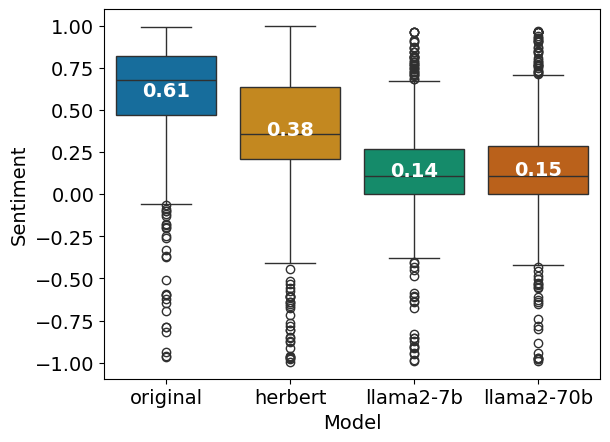

/var/folders/_y/q1ps6bbs2rdcgw5rsq6cwsz40000gn/T/ipykernel_88374/3821027063.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="model", y="generated_sentences_sentiment", data=df_sex, order=["original", "herbert", "llama2-7b", "llama2-70b"], palette='colorblind')


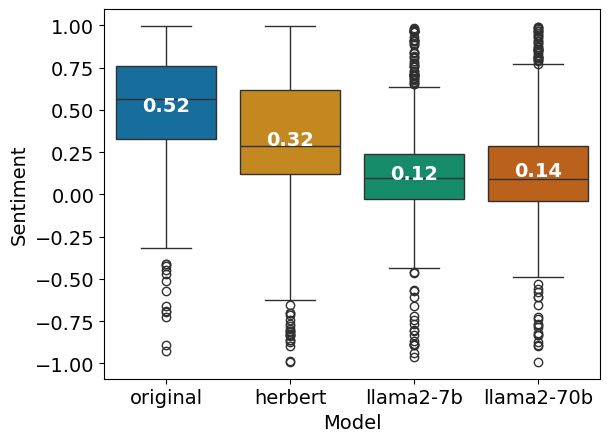

In [174]:
boxplot_gender_model(df, 'M')
plt.show()
boxplot_gender_model(df, 'F')
plt.show()

In [ ]:
# mean of sentiment for each model and gender for sanity check

for model in ['original', 'herbert', 'llama2-7b', 'llama2-70b']:
    for gender in ['M', 'F']:
        gender_model = df[(df['sex'] == gender) & (df['model'] == model)]
        print(f"{gender} {model}: {gender_model['generated_sentences_sentiment'].mean()}")

M original: 0.613052133760274
F original: 0.522724906884665
M herbert: 0.3799127229043549
F herbert: 0.32498954537495406
M llama2-7b: 0.14025005202561794
F llama2-7b: 0.12270193691749455
M llama2-70b: 0.14512215369725448
F llama2-70b: 0.1411143623762907
